In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pyfixest as pf
import warnings
warnings.simplefilter('ignore')




In [2]:
git_path = "https://github.com/imccart/Insurance-Access/raw/refs/heads/master/data/output/"
final_data = pd.read_csv(git_path + "acs_medicaid.txt", sep="\t")

# Create percentage variables
final_data = (
    final_data.assign(
        perc_private=(final_data["ins_employer"] + final_data["ins_direct"]) / final_data["adult_pop"],
        perc_public=(final_data["ins_medicare"] + final_data["ins_medicaid"]) / final_data["adult_pop"],
        perc_ins=(final_data["adult_pop"] - final_data["uninsured"]) / final_data["adult_pop"],
        perc_unins=final_data["uninsured"] / final_data["adult_pop"],
        perc_employer=final_data["ins_employer"] / final_data["adult_pop"],
        perc_medicaid=final_data["ins_medicaid"] / final_data["adult_pop"],
        perc_medicare=final_data["ins_medicare"] / final_data["adult_pop"],
        perc_direct=final_data["ins_direct"] / final_data["adult_pop"],
    )
    .loc[~final_data["State"].isin(["Puerto Rico", "District of Columbia"])]
)

In [5]:
print(final_data.describe())

              year     adult_pop  ins_employer    ins_direct  ins_medicare  \
count   400.000000  4.000000e+02  4.000000e+02  4.000000e+02     400.00000   
mean   2015.500000  3.881077e+06  2.193638e+06  3.127943e+05   47919.51750   
std       2.294157  4.375757e+06  2.355459e+06  3.906798e+05   47407.01891   
min    2012.000000  3.293650e+05  1.947960e+05  1.553400e+04    1532.00000   
25%    2013.750000  1.098706e+06  5.548062e+05  8.343075e+04   10979.50000   
50%    2015.500000  2.686457e+06  1.440655e+06  2.021255e+05   33369.50000   
75%    2017.250000  4.445620e+06  2.729329e+06  3.521965e+05   66472.75000   
max    2019.000000  2.445185e+07  1.321647e+07  2.427618e+06  235939.00000   

       ins_medicaid     uninsured  expand_year  perc_private  perc_public  \
count  4.000000e+02  4.000000e+02   264.000000    400.000000   400.000000   
mean   4.038630e+05  5.831027e+05  2014.515152      0.653532     0.110335   
std    6.029094e+05  8.497917e+05     1.260604      0.057686     0

In [3]:
#Q1
# groupby year and sum adult pop and ins_direct for each state 
Nat_share = insurance.groupby('year')[['ins_direct', 'adult_pop']].sum()
Nat_share['Nat_dir_share'] = Nat_share['ins_direct'] / Nat_share['adult_pop']

# Plotting the national share of direct purchase insurance
plt.figure(figsize=(10, 6))
plt.plot(Nat_share.index, Nat_share['Nat_dir_share'], marker='o', label='National Share of Direct Purchase Insurance')
plt.axvline(x=2013.5, color="black", linestyle="--")
plt.title('Share of Population with Direct Insurance Over Time')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Share of Population with Direct Insurance')
plt.grid()
plt.show()


NameError: name 'insurance' is not defined

# Q2


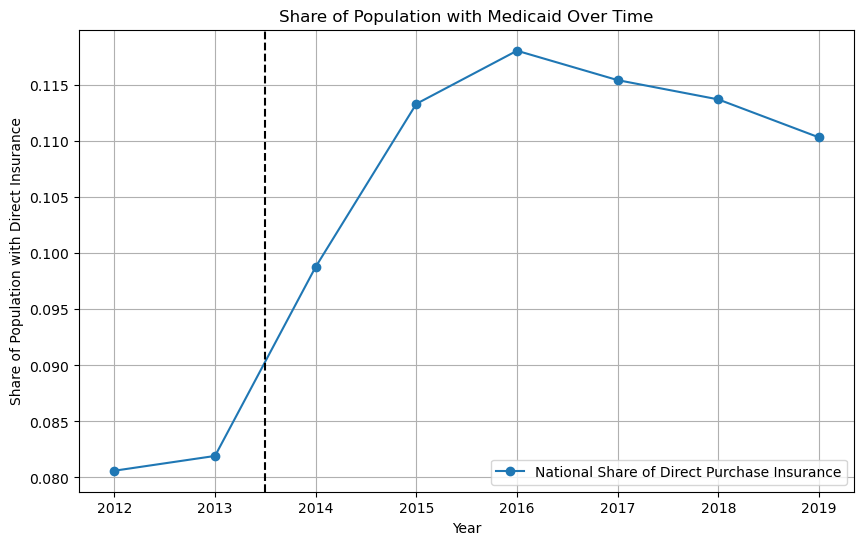

In [ ]:
#Q3
# groupby year and sum adult pop and ins_direct for each state 
Nat_share_MA = medicaid.groupby('year')[['ins_medicaid', 'adult_pop']].sum()
Nat_share_MA['Nat_dir_share'] = Nat_share_MA['ins_medicaid'] / Nat_share_MA['adult_pop']

# Plotting the national share of direct purchase insurance
plt.figure(figsize=(10, 6))
plt.plot(Nat_share_MA.index, Nat_share_MA['Nat_dir_share'], marker='o', label='National Share of Direct Purchase Insurance')
plt.axvline(x=2013.5, color="black", linestyle="--")
plt.grid()
plt.title('Share of Population with Medicaid Over Time')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Share of Population with Direct Insurance')
plt.show()



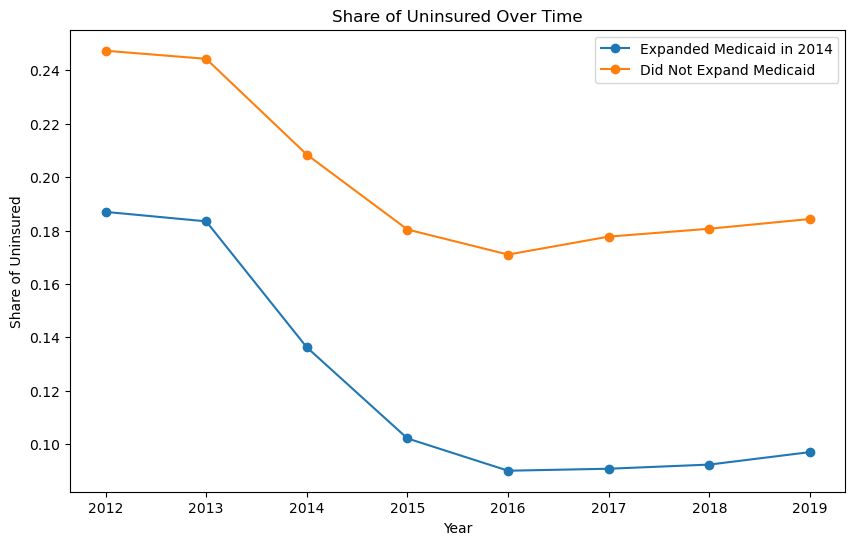

In [ ]:
#Q4
#Drop all states that expanded after 2014.
# Ensure 'date_adopted' is in datetime format
exp['date_adopted'] = pd.to_datetime(exp['date_adopted'])

# Keep only rows where expansion was in 2014 or earlier
exp_2014 = exp[exp['date_adopted'].dt.year <= 2014]
states_exp_2014 = exp_2014['State'].unique().tolist()
non_exp_states = exp[exp['expanded'] == False]
non_exp_state_list = non_exp_states['State'].unique().tolist()
#Plot the share of uninsured over time, separately by states that expanded Medicaid in 2014 versus those that did not. 


insurance_expanded = insurance[insurance['State'].isin(states_exp_2014)]
exp_share_uninsured = insurance_expanded.groupby('year')[['uninsured', 'adult_pop']].sum()
exp_share_uninsured['uninsured_share'] = exp_share_uninsured['uninsured'] / exp_share_uninsured['adult_pop']

insurance_nonexpanded = insurance[insurance['State'].isin(non_exp_state_list)]
nonexp_share_uninsured = insurance_nonexpanded.groupby('year')[['uninsured', 'adult_pop']].sum()
nonexp_share_uninsured['uninsured_share'] = nonexp_share_uninsured['uninsured'] / nonexp_share_uninsured['adult_pop']

# plot both together on same figure
plt.figure(figsize=(10, 6))
plt.plot(exp_share_uninsured.index, exp_share_uninsured['uninsured_share'], marker='o', label='Expanded Medicaid in 2014')
plt.plot(nonexp_share_uninsured.index, nonexp_share_uninsured['uninsured_share'], marker='o', label='Did Not Expand Medicaid')
plt.title('Share of Uninsured Over Time')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Share of Uninsured')
plt.show()

In [ ]:
#Q5

exp_filtered = exp_share_uninsured.loc[[2012, 2015], 'uninsured_share']
nonexp_filtered = nonexp_share_uninsured.loc[[2012, 2015], 'uninsured_share']

# DD 2x2 table
dd_table = pd.DataFrame({
    'Expansion States': exp_filtered,
    'Non-Expansion States': nonexp_filtered
})

dd_table.index.name = 'Year'
print(dd_table)

      Expansion States  Non-Expansion States
Year                                        
2012          0.186983              0.247324
2015          0.102153              0.180381


In [ ]:
# 6
# Add treatment flag and stack data
exp2 = exp_share_uninsured[['uninsured', 'adult_pop']].copy()
exp2['group'] = 1  # Treated group
exp2['year'] = exp2.index

nonexp = nonexp_share_uninsured[['uninsured', 'adult_pop']].copy()
nonexp['group'] = 0  # Control group
nonexp['year'] = nonexp.index

#  Combine into one DataFrame
reg_df = pd.concat([exp2, nonexp], ignore_index=True)

# Step 3: Create DD variables
reg_df['post'] = (reg_df['year'] > 2013).astype(int)
reg_df['interaction'] = reg_df['group'] * reg_df['post']
reg_df['uninsured_share'] = reg_df['uninsured'] / reg_df['adult_pop']

#  Run DD regression
model = smf.ols("uninsured_share ~ group + post + interaction", data=reg_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        uninsured_share   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     66.63
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           9.44e-08
Time:                        11:42:52   Log-Likelihood:                 47.743
No. Observations:                  16   AIC:                            -87.49
Df Residuals:                      12   BIC:                            -84.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2458      0.010     24.592      

In [ ]:
 
exp['date_adopted'] = pd.to_datetime(exp['date_adopted'])
# add year column and adjust date_adopted to year
exp['year'] = exp['date_adopted'].dt.year
print(insurance_nonexpanded.head())


      State  year  adult_pop  ins_employer  ins_direct  ins_medicare  \
0   Alabama  2012    2937335       1528419      180043         56890   
9   Florida  2012   11578613       5365172      860060        148499   
10  Georgia  2012    6117277       3181157      345523         82211   
11    Idaho  2012     944959        475318       89013         10683   
16   Kansas  2012    1729836       1045580      125214         16433   

    ins_medicaid  uninsured  
0         190312     585091  
9         839467    3332786  
10        332449    1561266  
11         45484     217945  
16         66156     305904  


In [ ]:
#7

insurance_merged = insurance.merge(
    exp[['State', 'year', 'expanded']], 
    on=['State', 'year'], how='left'
)

expand_years = exp[exp['expanded'] == True].groupby('State')['year'].min().reset_index()
expand_years.columns = ['State', 'expand_year']

insurance_merged = insurance_merged.merge(expand_years, on='State', how='left')

df = insurance_merged[
    (insurance_merged['expand_year'] == 2014) | (insurance_merged['expand_year'].isna())
].copy()

df['treated'] = (df['expand_year'] == 2014).astype(int)
df['post'] = (df['year'] >= 2014).astype(int)
df['interaction'] = df['treated'] * df['post']
df['perc_unins'] = df['uninsured'] / df['adult_pop']

model = feols(
    fml='perc_unins ~ interaction | State + year',
    data=df,
    vcov={'CRV1': 'State'}
)

print(model.summary())

NameError: name 'feols' is not defined

In [ ]:
#8

insurance_merged = insurance.merge(
    exp[['State', 'year', 'expanded']], 
    on=['State', 'year'], how='left'
)

expand_years = exp[exp['expanded'] == True].groupby('State')['year'].min().reset_index()
expand_years.columns = ['State', 'expand_year']

insurance_merged = insurance_merged.merge(expand_years, on='State', how='left')

# all** states — no filtering

df_all = insurance_merged.copy()

df_all['treated'] = (df_all['expand_year'] == 2014).astype(int)
df_all['post'] = (df_all['year'] >= 2014).astype(int)
df_all['interaction'] = df_all['treated'] * df_all['post']
df_all['perc_unins'] = df_all['uninsured'] / df_all['adult_pop']

model_all = feols(
    fml='perc_unins ~ interaction | State + year',
    data=df_all,
    vcov={'CRV1': 'State'}
)

print(model_all.summary())

###

Estimation:  OLS
Dep. var.: perc_unins, Fixed effects: State+year
Inference:  CRV1
Observations:  416

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| interaction   |     -0.018 |        0.007 |    -2.398 |      0.020 | -0.032 |  -0.003 |
---
RMSE: 0.014 R2: 0.941 R2 Within: 0.072 
None


In [ ]:
#9
filtered_states = insurance_merged[(insurance_merged['expand_year'] == 2014) | (insurance_merged['expand_year'].isna())].copy()

#  (year - adopted year from exp data)
filtered_states['event_time'] = filtered_states['year'] - filtered_states['expand_year'].fillna(0)


# create dummies for every year -3 (3 before) to +5 to 2019
event_time_dummies = pd.get_dummies(filtered_states['event_time'], prefix='event_time')
filtered_states = pd.concat([filtered_states, event_time_dummies], axis=1)

X = filtered_states[event_time_dummies.columns.tolist()]
X = sm.add_constant(X)  # Add constant for intercept
#create filtered states ['perc_unins']
filtered_states['perc_unins'] = filtered_states['uninsured'] / filtered_states['adult_pop']
y = filtered_states['perc_unins']

# state dummies
state_dummies = pd.get_dummies(filtered_states['State'], prefix='State')
year_dummies = pd.get_dummies(filtered_states['year'], prefix='year')
X = pd.concat([X, state_dummies, year_dummies], axis=1)

model = sm.OLS(y, X).fit()

coefficients = model.params[event_time_dummies.columns]
conf_int = model.conf_int().loc[event_time_dummies.columns]

plt.figure(figsize=(10, 6))
plt.errorbar(
    coefficients.index.str.replace('event_time_', '').astype(int),  # Event time
    coefficients.values,  # Coefficients
    yerr=[
        coefficients.values - conf_int[0].values,  # Lower bound
        conf_int[1].values - coefficients.values   # Upper bound
    ],
    fmt='o', capsize=5, label='Event Study Coefficients'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Event Study: Effects of Medicaid Expansion')
plt.xlabel('Years Relative to Expansion')
plt.ylabel('Effect on Uninsured Percentage')
plt.legend()
plt.grid(True)
plt.show()
#10


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).